### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/var/folders/bf/f89y356d061dpv04rhvw5mpw0000gn/T/ipykernel_48694/3381811058.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Reading DataSet (check format of Dataset like csv,xlsx...)

In [2]:
df = pd.read_csv("/Users/pavansai/desktop1/Python/EDA/csv/cubic_zirconia.csv")
df


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


### Viewing DataSet
### Check what are dependent and indepndent columns

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


## Gives the inforamtion on data set.

### 1. How many columns are present.
### 2. What are the different datatypes that are present in different columns[Numerical or Categorical]
### 3. Check the number of entries present (this many rows are present in the dataset).
### 4. If there are any null values present in the data set.



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


### Unnamed column consits of all unq values it is not much informative so we will drop

In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


### 1. chechking the descriptive stats(5 pt summary i.e, min,max,25%,50%,75%)
### 2. comparing mean and median (to check if there are any outliers present in a column)
### 3.if there are any categorical columns check the number of unique values present and check its top and frequency.


In [6]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8
price,26967.0,NaN,NaN,NaN,3939.518115,4024.864666,326.0,945.0,2375.0,5360.0,18818.0


In [7]:
df[(df['x']==0) | (df['y']==0) | (df['z']==0) ] 

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


### As dimensions cant be zero we will replace these values with medain

In [8]:
df['x'].replace(0,df['x'].median(),inplace=True)
df['y'].replace(0,df['y'].median(),inplace=True)
df['z'].replace(0,df['z'].median(),inplace=True)

/var/folders/bf/f89y356d061dpv04rhvw5mpw0000gn/T/ipykernel_48694/1091536945.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['x'].replace(0,df['x'].median(),inplace=True)
/var/folders/bf/f89y356d061dpv04rhvw5mpw0000gn/T/ipykernel_48694/1091536945.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

### We can confirm that there are no  0 dimension values


In [9]:
df[df['x'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [10]:
df[df['y'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [11]:
df[df['z'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price


### Either impute or drop null values
### outliers should be imputed with mean
### Null values present in categorical column use mode for imputation
### If there are large percantage of missing values present in the column then drop it, else try to impute it.

In [12]:
df.isnull().sum() #we have missing values in only one column i.e, depth

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

### Check the percentage of missing columns

In [13]:

for i in df.columns:
    y = df[i].isnull().sum()/df.shape[0]
    print('Precentage of missing values is {} % in {} '.format(round(
        (y)*100,2),i))


Precentage of missing values is 0.0 % in carat 
Precentage of missing values is 0.0 % in cut 
Precentage of missing values is 0.0 % in color 
Precentage of missing values is 0.0 % in clarity 
Precentage of missing values is 2.58 % in depth 
Precentage of missing values is 0.0 % in table 
Precentage of missing values is 0.0 % in x 
Precentage of missing values is 0.0 % in y 
Precentage of missing values is 0.0 % in z 
Precentage of missing values is 0.0 % in price 


## Assigning median to missing values in depth column

In [14]:
m = df['depth'].median()
m

61.8

In [15]:
df['depth'] = df['depth'].fillna(m)

In [16]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [17]:
df['cut'].value_counts()

cut
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: count, dtype: int64

## This describes this is categorical ordinal data
### Within CUT Ideal is best and Fair is worst
### Within COLOR D is best and J is worst

df.groupby('cut').median().T  

df.groupby('color').median().T    

df.groupby('clarity').median().T


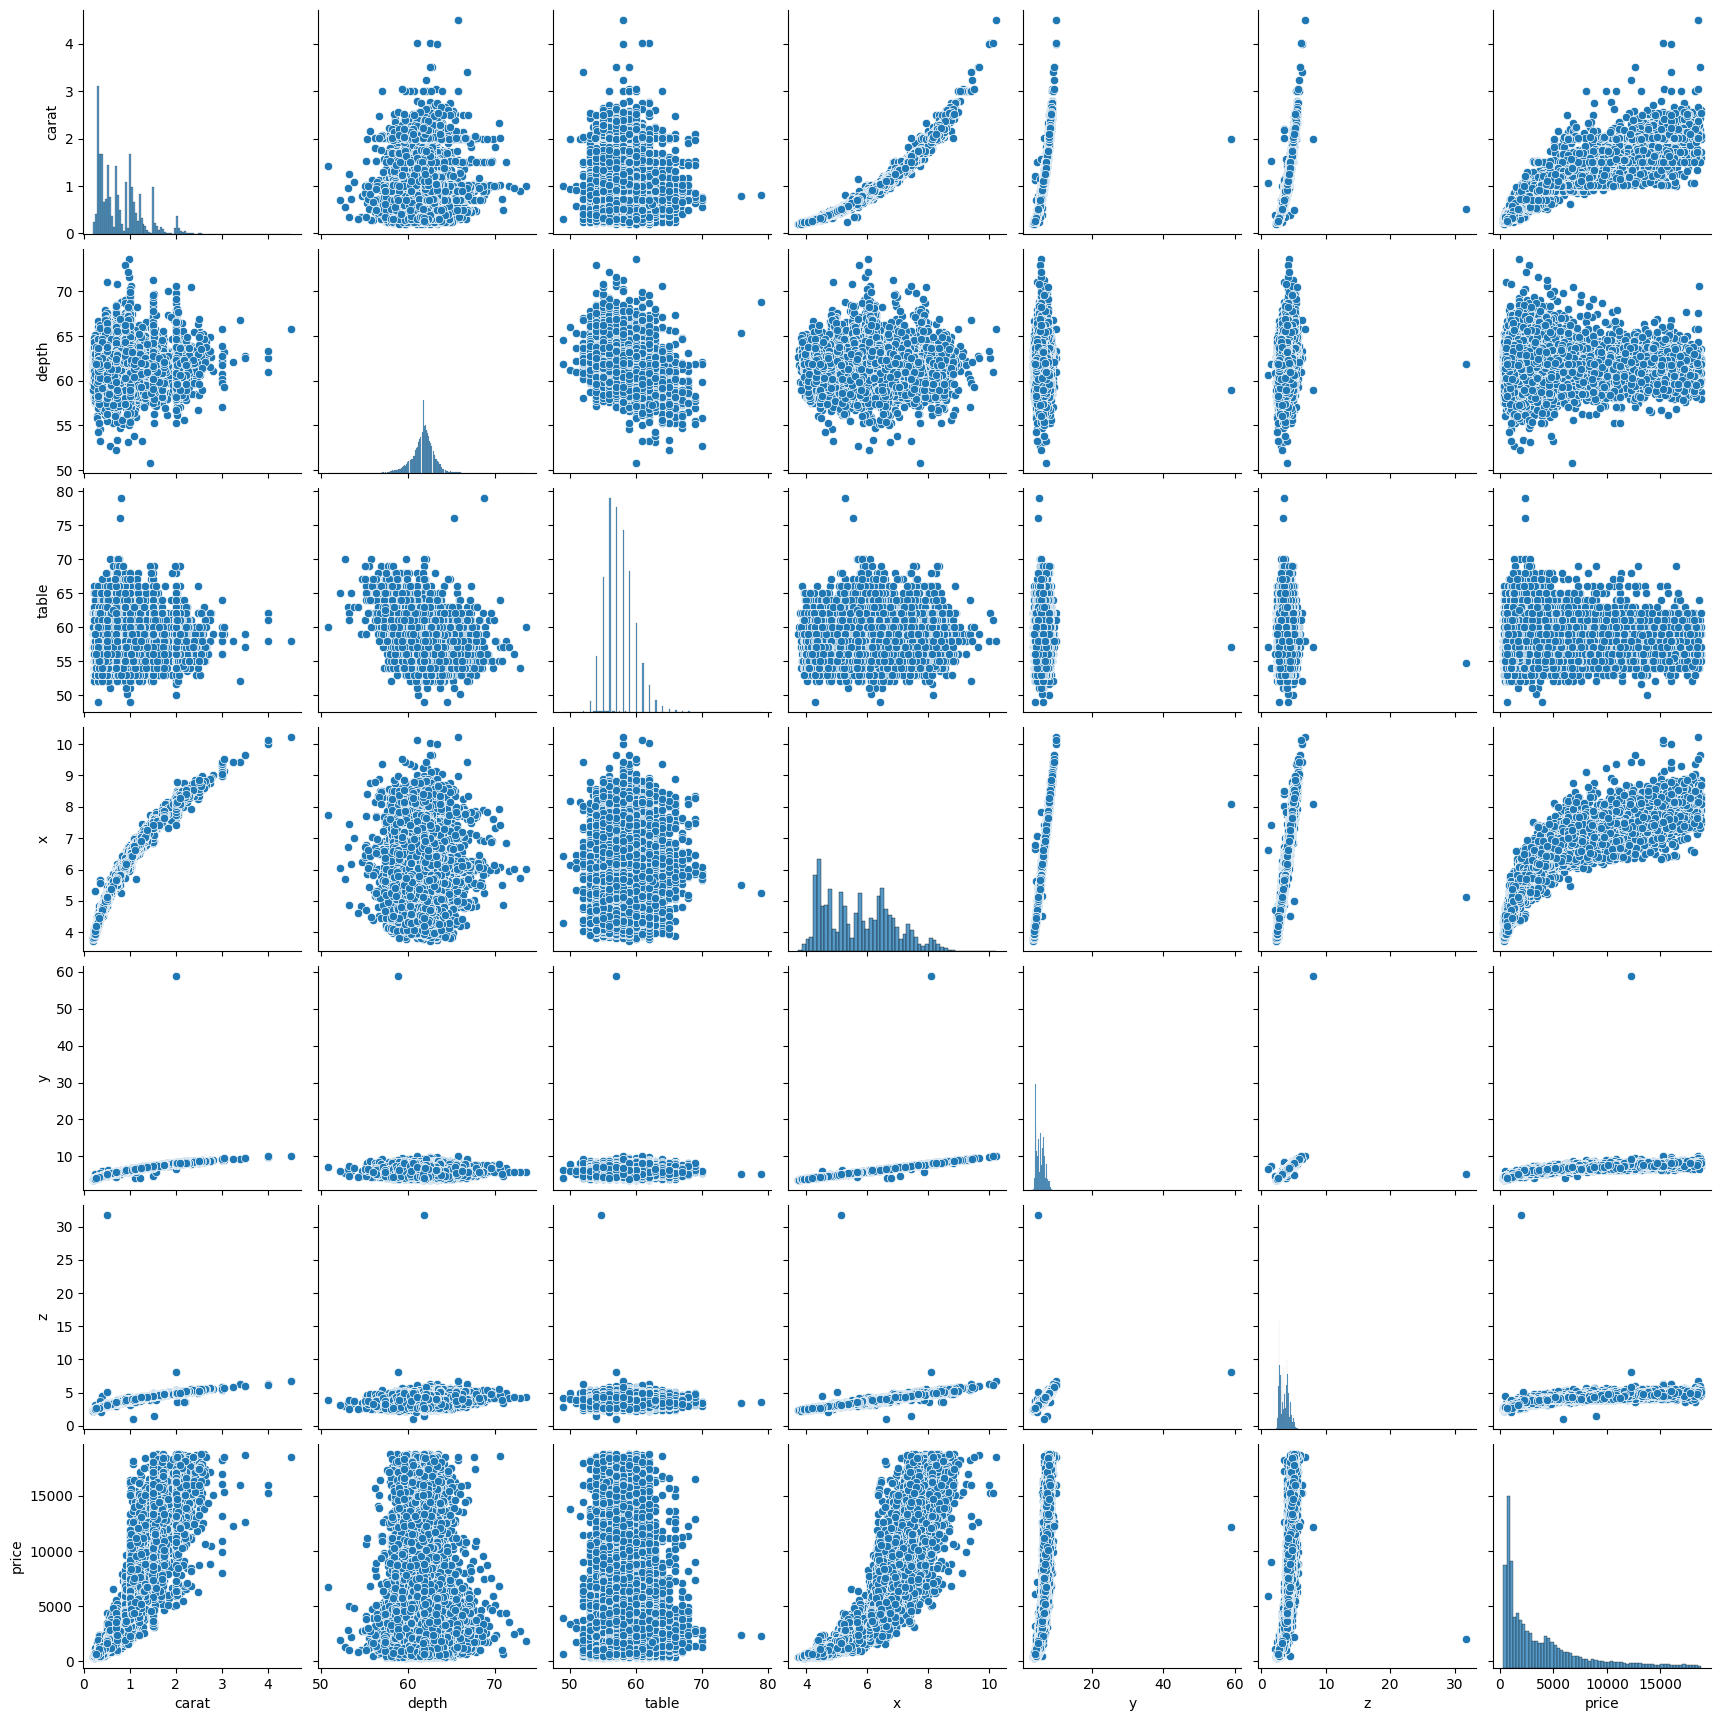

In [18]:
import seaborn as sns

# Plotting a pairplot
sns.pairplot(df)
plt.show()


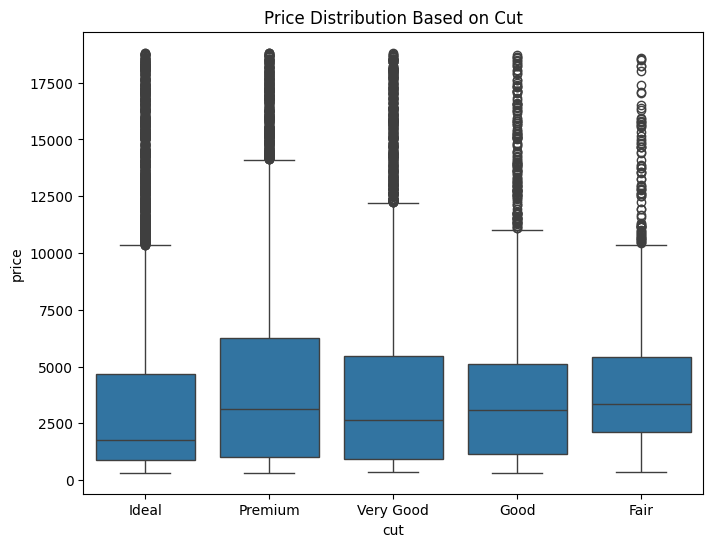

In [19]:
# Boxplot for price based on cut
plt.figure(figsize=(8, 6))
sns.boxplot(x='cut', y='price', data=df)
plt.title('Price Distribution Based on Cut')
plt.show()


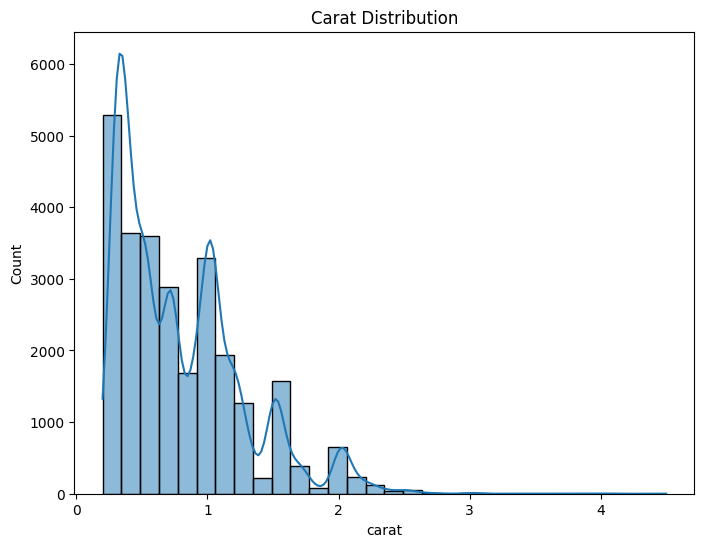

In [20]:
# Histogram for carat
plt.figure(figsize=(8, 6))
sns.histplot(df['carat'], bins=30, kde=True)
plt.title('Carat Distribution')
plt.show()


In [21]:
(df.describe())

,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.746564,57.456080,5.730487,5.734204,3.539232,3939.518115
std,0.477745,1.394509,2.232068,1.126897,1.164488,0.717718,4024.864666
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


### Data visualisation for categorical data

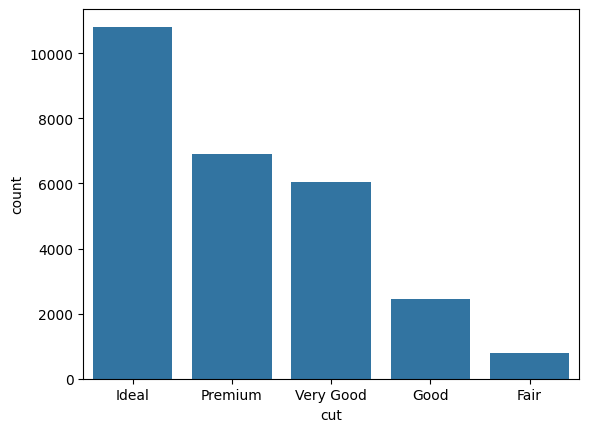

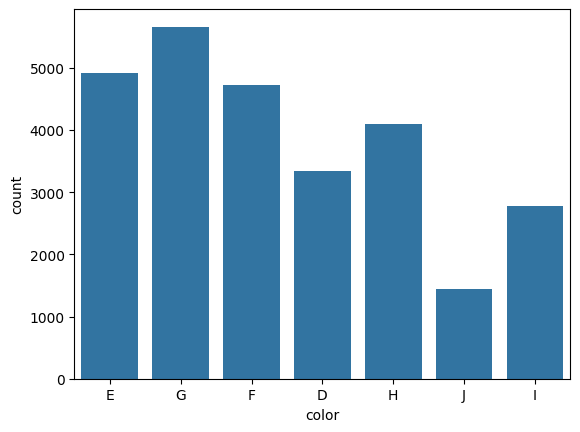

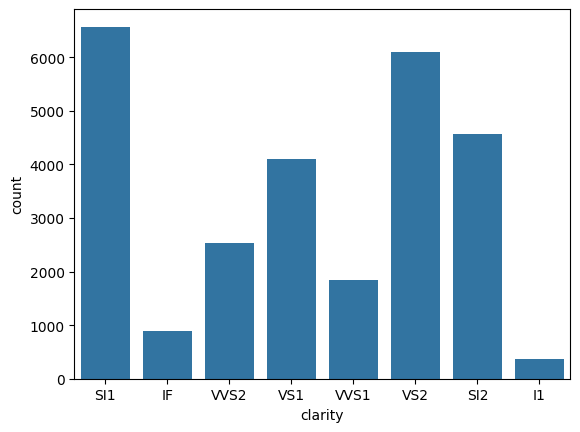

In [22]:
for col in df.select_dtypes(include='object'):
    sns.countplot(x=df[col])
    plt.show()

## Data visualisation

<Axes: >

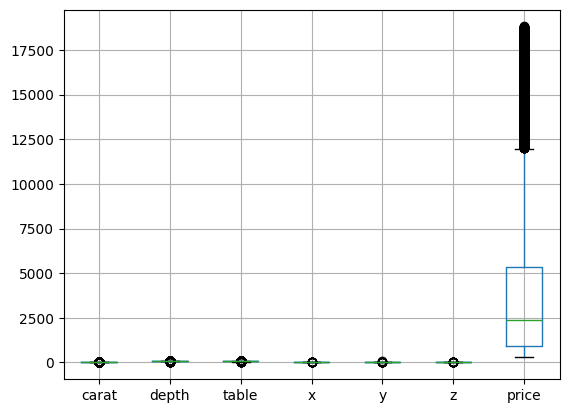

In [23]:
df.boxplot()

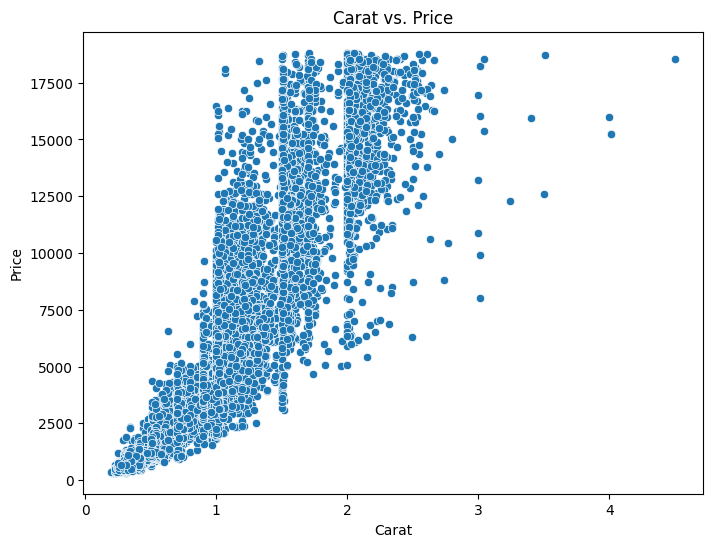

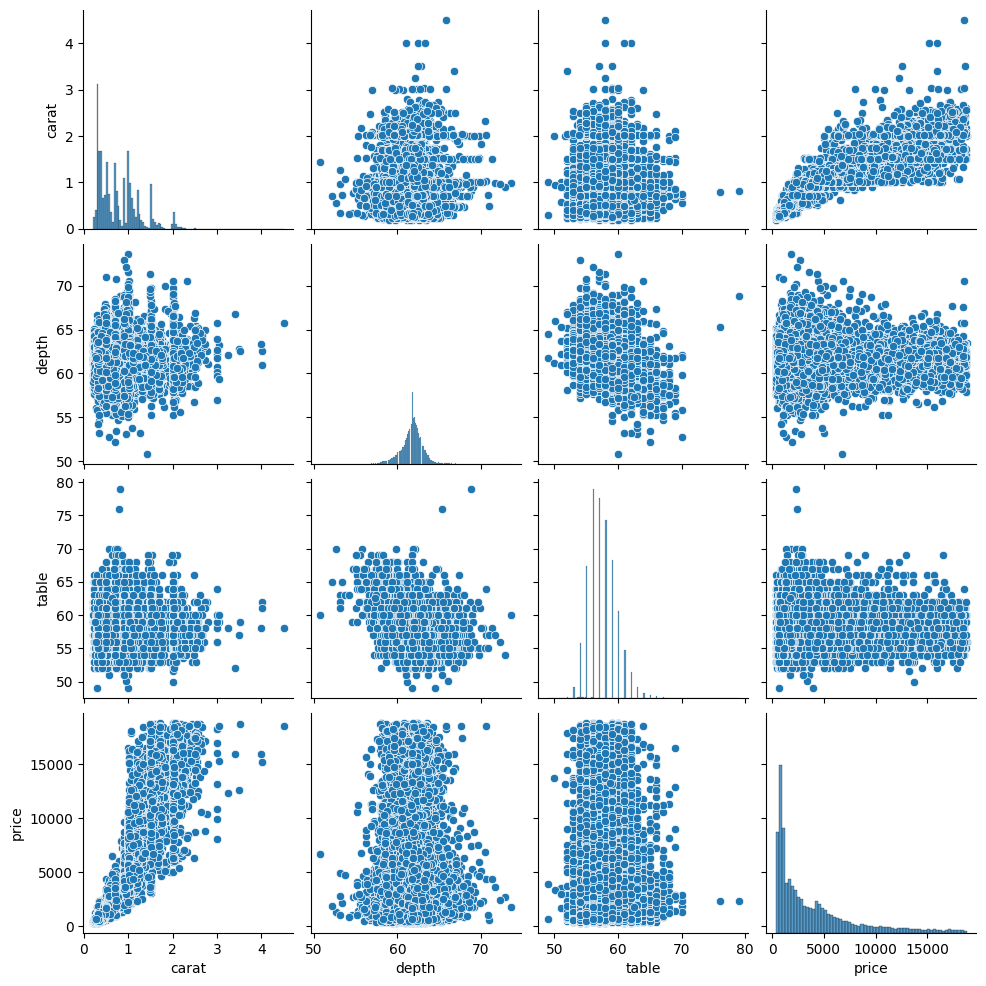

In [24]:
# Scatter plot for 'carat' vs. 'price'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='carat', y='price', data=df)
plt.title('Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

# Pairplot for multiple numeric variables
sns.pairplot(df[['carat', 'depth', 'table', 'price']])
plt.show()


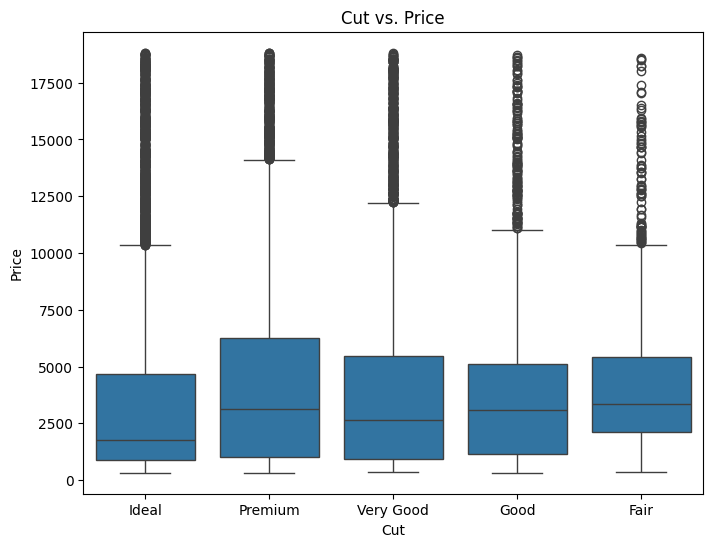

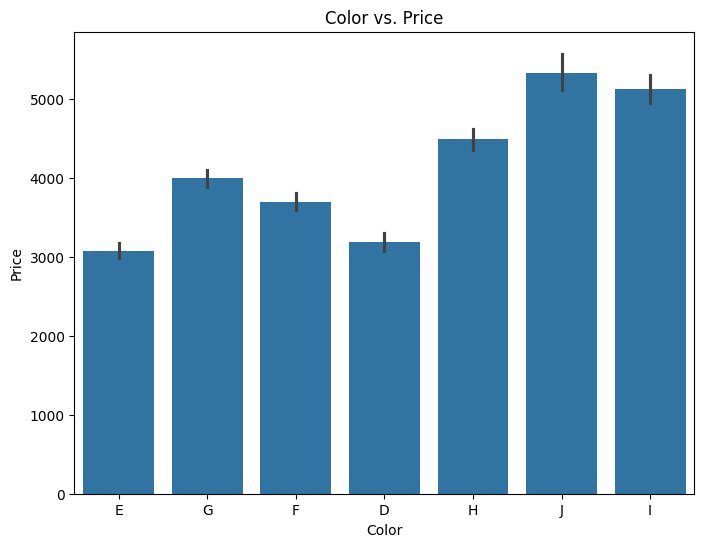

In [25]:
# Boxplot for 'cut' vs. 'price'
plt.figure(figsize=(8, 6))
sns.boxplot(x='cut', y='price', data=df)
plt.title('Cut vs. Price')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()

# Bar plot for 'color' vs. 'price'
plt.figure(figsize=(8, 6))
sns.barplot(x='color', y='price', data=df)
plt.title('Color vs. Price')
plt.xlabel('Color')
plt.ylabel('Price')
plt.show()


color         D     E     F     G     H     I    J
cut                                               
Fair         74   100   148   147   150    94   68
Good        311   491   454   419   352   253  161
Ideal      1409  1966  1893  2470  1552  1073  453
Premium     808  1174  1167  1471  1161   711  407
Very Good   742  1186  1067  1154   887   640  354


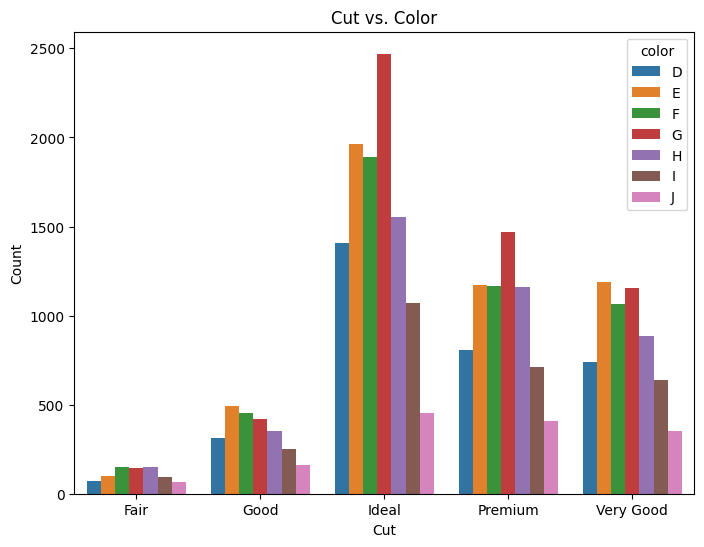

In [26]:
# Cross-tabulation between 'cut' and 'color'
cross_tab = pd.crosstab(df['cut'], df['color'])
print(cross_tab)

# Stacked bar plot for 'cut' and 'color'
stacked_data = cross_tab.stack().reset_index().rename(columns={0: 'Count'})
plt.figure(figsize=(8, 6))
sns.barplot(x=stacked_data['cut'], y=stacked_data['Count'], hue=stacked_data['color'])
plt.title('Cut vs. Color')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.show()


<Figure size 800x600 with 0 Axes>

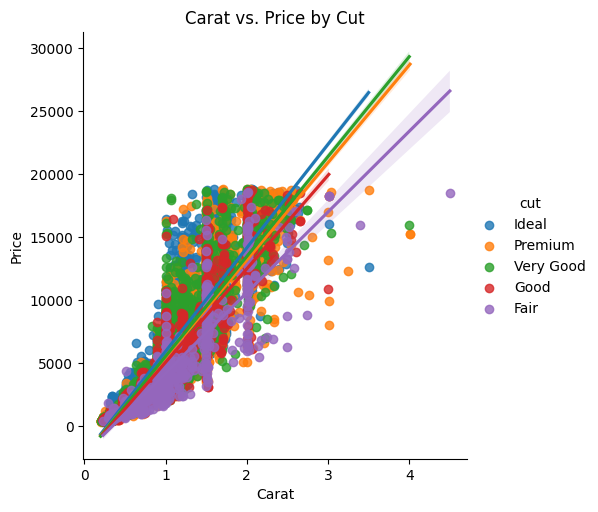

In [27]:
plt.figure(figsize=(8, 6))
sns.lmplot(x='carat', y='price', data=df, hue='cut')
plt.title('Carat vs. Price by Cut')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()


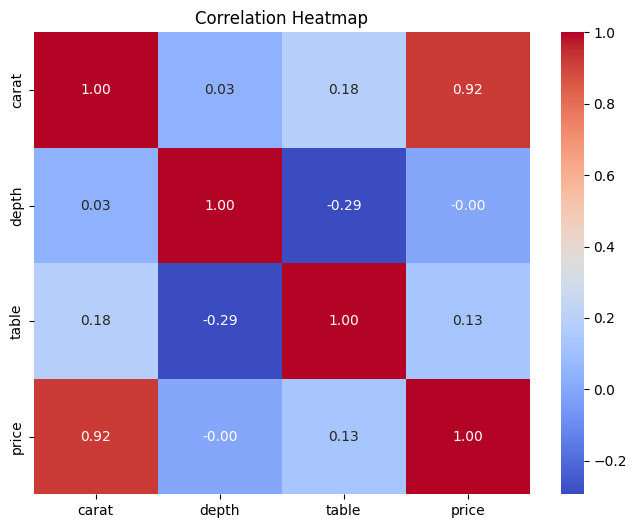

In [28]:
# Calculate the correlation matrix
correlation_matrix = df[['carat', 'depth', 'table', 'price']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



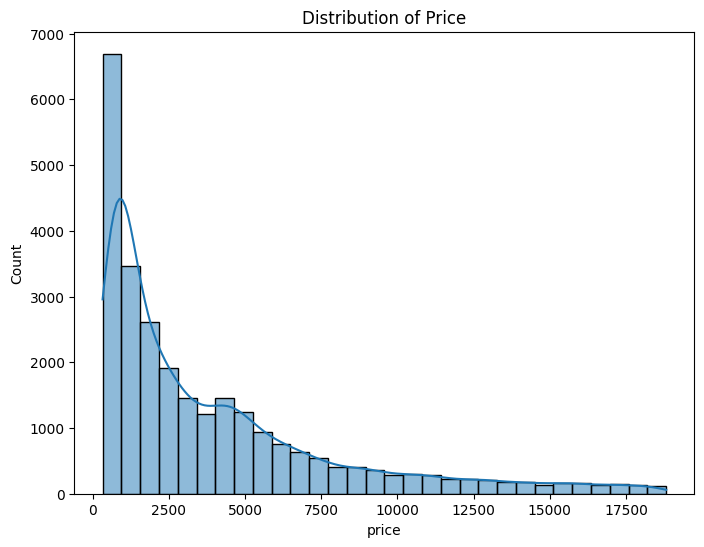

In [29]:
import numpy as np
from scipy import stats

# Visualizing the distribution of 'price'
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of Price')
plt.show()


In [30]:
# Shapiro-Wilk test for normality
p_value = stats.shapiro(df['price']).pvalue

if p_value > 0.05:
    print("The 'price' column appears to be normally distributed (p-value: {:.4f})".format(p_value))
else:
    print("The 'price' column does not appear to be normally distributed (p-value: {:.4f})".format(p_value))


The 'price' column does not appear to be normally distributed (p-value: 0.0000)


/var/folders/bf/f89y356d061dpv04rhvw5mpw0000gn/T/ipykernel_48694/3516238876.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 26967.
  p_value = stats.shapiro(df['price']).pvalue


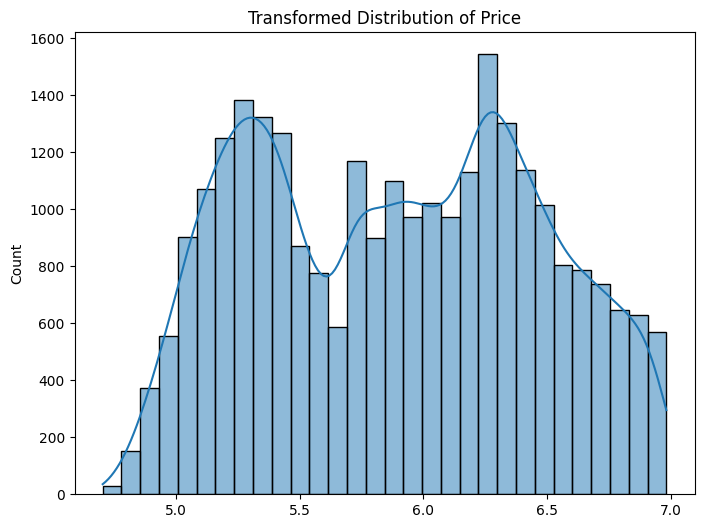

In [31]:
# Applying Box-Cox transformation to 'price'
transformed_price, _ = stats.boxcox(df['price'])

# Visualizing the transformed distribution
plt.figure(figsize=(8, 6))
sns.histplot(transformed_price, kde=True, bins=30)
plt.title('Transformed Distribution of Price')
plt.show()


In [32]:
from scipy.stats import f_oneway

cut_categories = df['cut'].unique()

cut_data = {category: df['price'][df['cut'] == category] for category in cut_categories}

f_statistic, p_value = f_oneway(*cut_data.values())

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference in mean prices among 'cut' categories.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in mean prices among 'cut' categories.")


Reject the null hypothesis. There is a statistically significant difference in mean prices among 'cut' categories.


### Function for univariate data visualisation

In [33]:
def uni_plot(columns):
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    sns.histplot(data=df,x=columns,kde=True,bins=20)
    plt.title('Histogram of {}'.format(columns))
    plt.subplot(2,2,2)
    sns.boxplot(data=df,x=columns)
    plt.title('Boxplot of {}'.format(columns))
    plt.show()

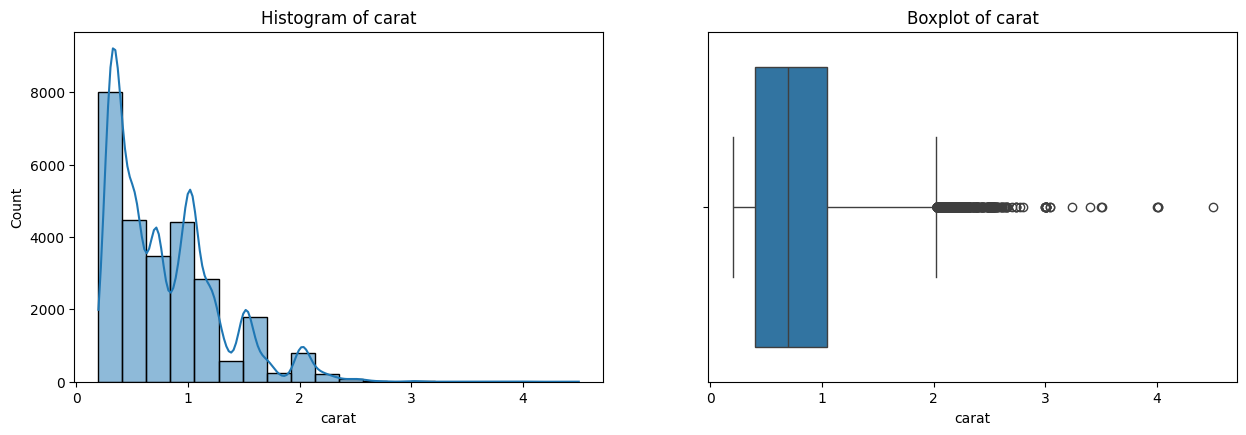

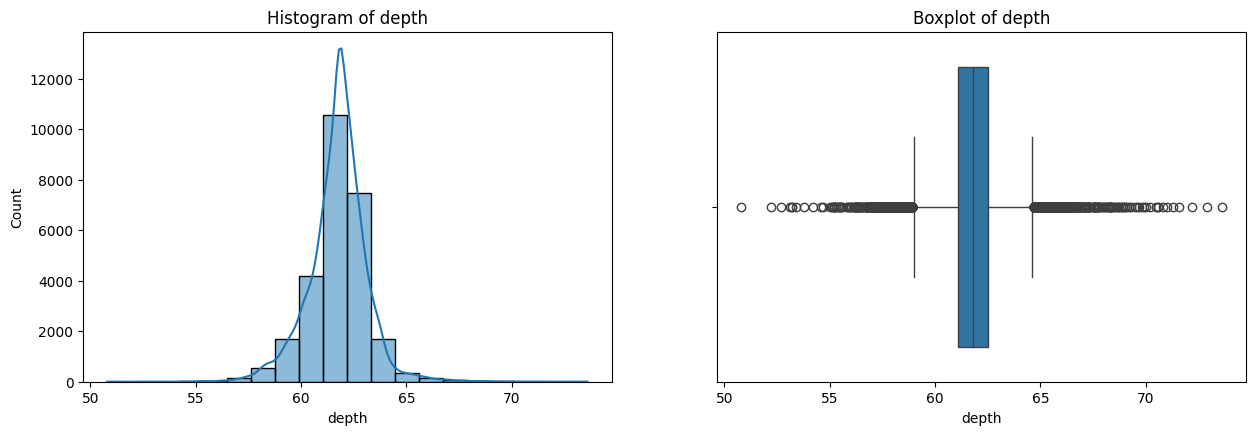

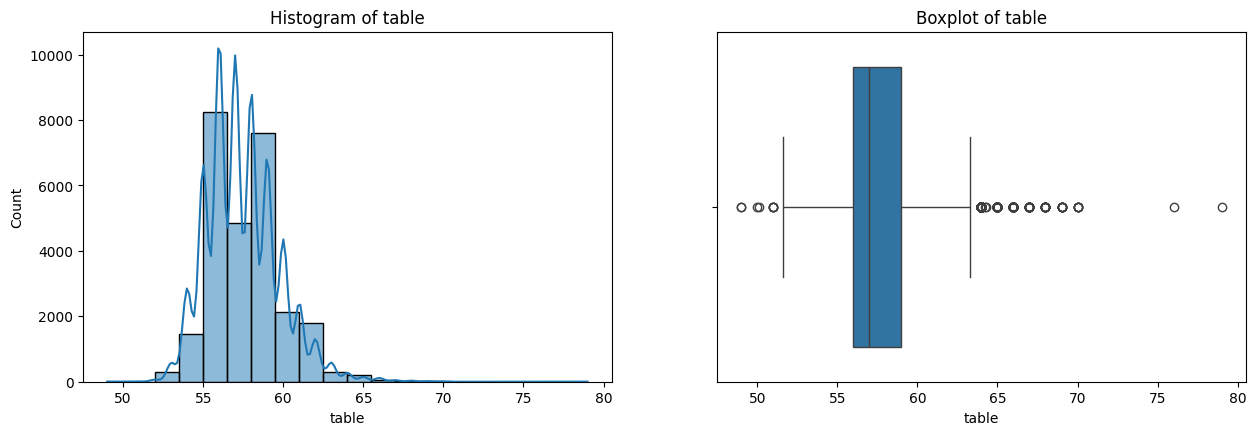

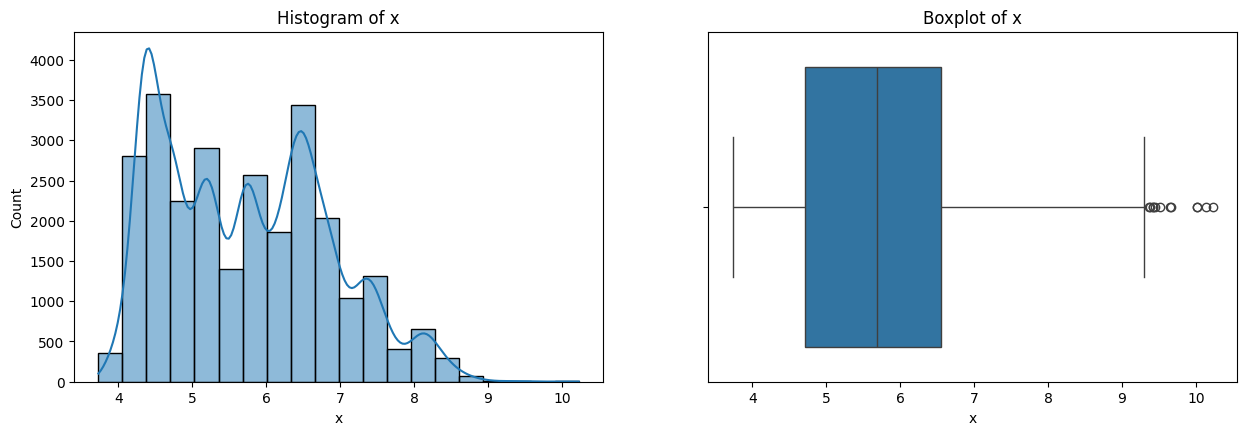

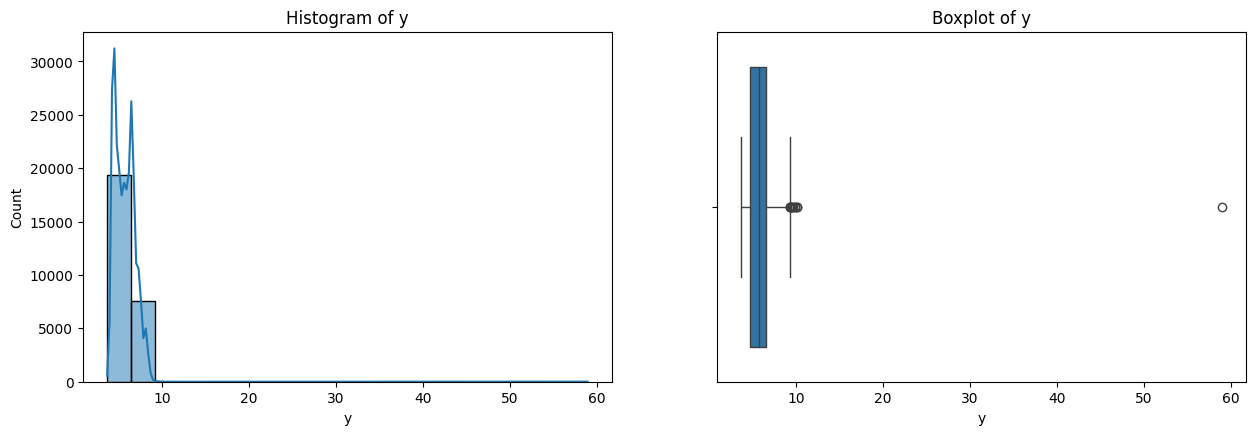

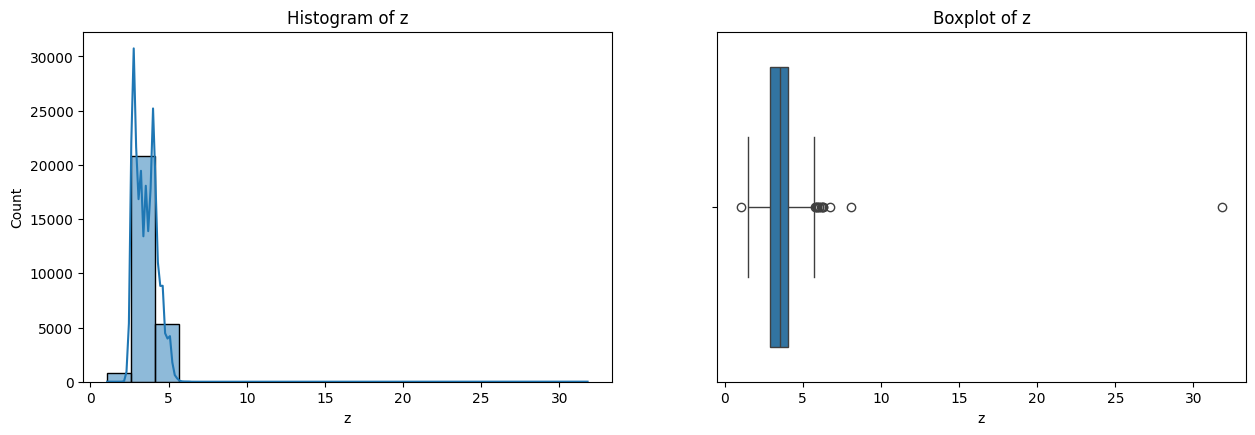

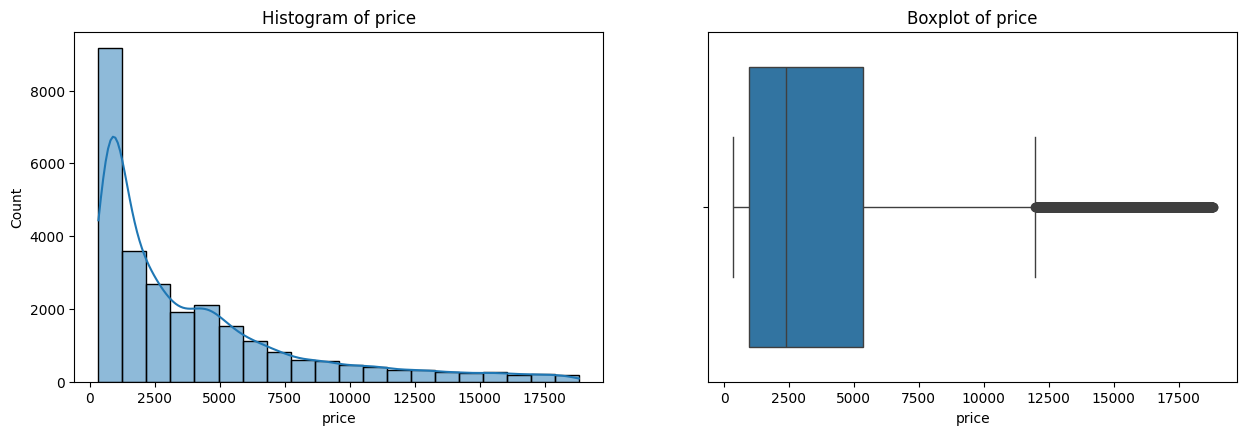

In [34]:
for i in df .select_dtypes(exclude='object'):
    uni_plot(i)

In [35]:
def outliers_per(col):
    Q1 = np.quantile(df[col],.25)
    Q3 = np.quantile(df[col],.75)
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    upper_count = df[df[col] > upper_range][col].count()
    upper_percentage = (upper_count/df.shape[0])*100
    lower_count = df[df[col] < lower_range][col].count()
    lower_percentage = (lower_count/df.shape[0])*100
    return print('Outlier percentage of {col} upper range is {upper}% and lower range is {lower}%\n'.format(col=col,upper=round(upper_percentage,2),lower=round(lower_percentage,2)))

In [36]:
for i in df.select_dtypes(exclude='object').columns:
    outliers_per(i)

Outlier percentage of carat upper range is 2.45% and lower range is 0.0%

Outlier percentage of depth upper range is 1.92% and lower range is 3.34%

Outlier percentage of table upper range is 1.15% and lower range is 0.03%

Outlier percentage of x upper range is 0.04% and lower range is 0.0%

Outlier percentage of y upper range is 0.04% and lower range is 0.0%

Outlier percentage of z upper range is 0.05% and lower range is 0.0%

Outlier percentage of price upper range is 6.6% and lower range is 0.0%



## Replacing outliers with their upper and lower range

In [37]:
def replace_outlier(col):
    Q1, Q3 = np.quantile(col, [.25, .75])
    IQR = Q3 - Q1
    LL = Q1 - 1.5*IQR
    UL = Q3 + 1.5*IQR
    return LL, UL #Winsorization - UL - Capping, LL - Flooring

In [38]:
for i in df.select_dtypes(exclude='object'):
    LL, UL = replace_outlier(df[i])
    df[i] = np.where(df[i]> UL, UL, df[i])
    df[i] = np.where(df[i]< LL, LL, df[i])#Winsorization - Capping and Flooring


sns.heatmap(df.corr(),annot=True,cbar=False,mask=np.triu(df.corr(),+1))

## Bi variate Analysis
### It is done According to dependent col and categorical col
### Merging all nearby median values in price

<Axes: xlabel='cut', ylabel='price'>

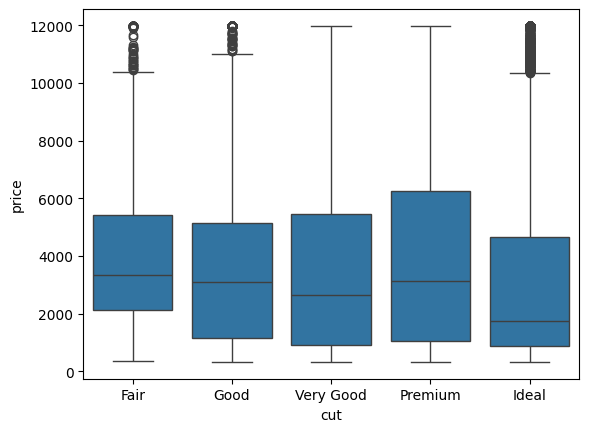

In [39]:
sns.boxplot(data=df,y='price',x='cut',order=['Fair','Good','Very Good','Premium','Ideal'])# Compare eith median columns

df.groupby('cut').median().T

In [40]:
df['cut'] = np.where(df['cut'] == 'Fair', 'Premium',df['cut'])# where ever the color is F, replace with G otherwise replace it with same
df['cut'] = np.where(df['cut'] == 'Very Good', 'Good',df['cut'])#This is Data Transformation

In [41]:
df['cut'].value_counts()

cut
Ideal      10816
Good        8471
Premium     7680
Name: count, dtype: int64

<Axes: xlabel='cut', ylabel='price'>

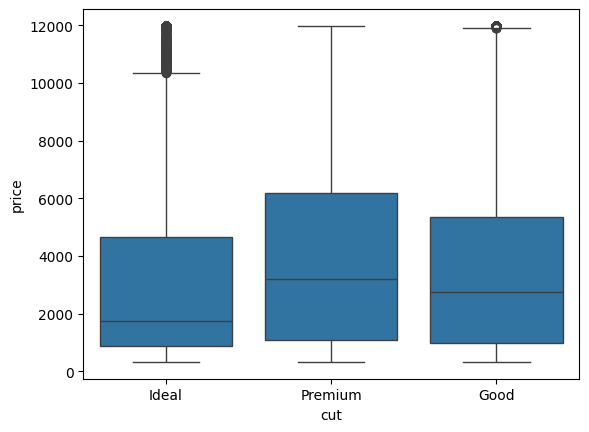

In [42]:
sns.boxplot(data=df,y='price',x='cut')

<Axes: xlabel='clarity', ylabel='price'>

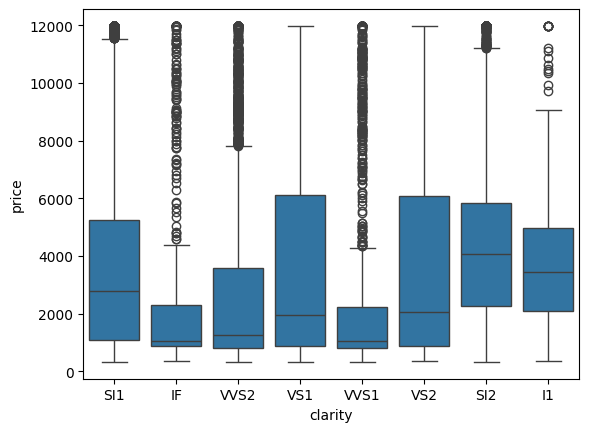

In [43]:
sns.boxplot(data=df,y='price',x='clarity')

df.groupby('clarity').median().T

In [44]:
df['clarity'] = np.where(df['clarity'] == 'IF', 'VVS1',df['clarity'])
df['clarity'] = np.where(df['clarity'] == 'VS1', 'VS2',df['clarity'])

In [45]:
df['clarity'].value_counts()

clarity
VS2     10192
SI1      6571
SI2      4575
VVS1     2733
VVS2     2531
I1        365
Name: count, dtype: int64

<Axes: xlabel='clarity', ylabel='price'>

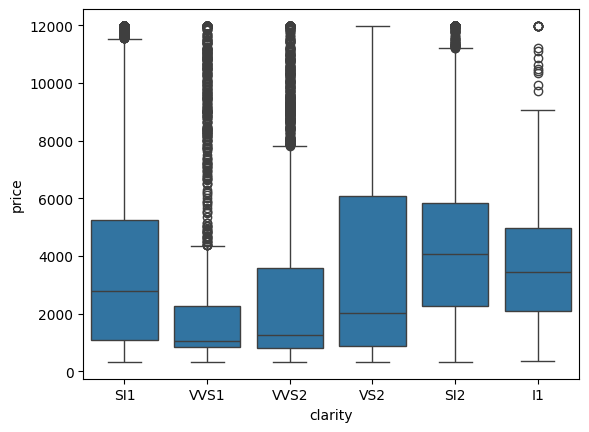

In [46]:
sns.boxplot(data=df,y='price',x='clarity')

<Axes: xlabel='color', ylabel='price'>

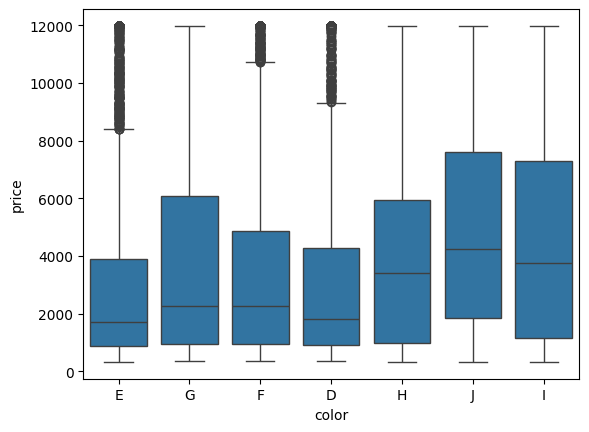

In [47]:
sns.boxplot(data=df,y='price',x='color') 

df.groupby('color').median().T

In [49]:
df['color'] = np.where(df['color'] == 'F','G',df['color']) 
df['color'] = np.where(df['color'] == 'D','E',df['color'])

In [50]:
df['color'].value_counts()

color
G    10390
E     8261
H     4102
I     2771
J     1443
Name: count, dtype: int64

<Axes: xlabel='color', ylabel='price'>

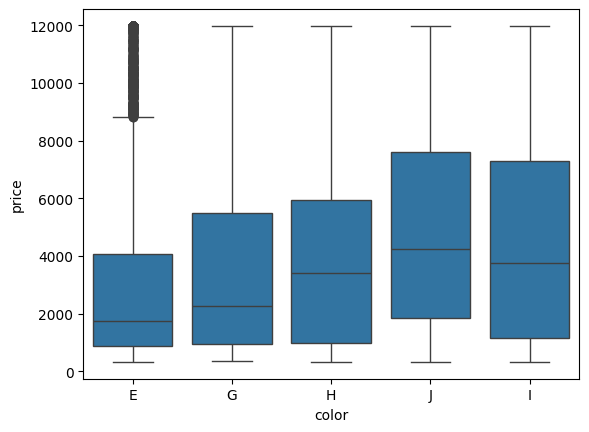

In [51]:
sns.boxplot(data=df,y='price',x='color') 

## Data Encoding -- Conversion of categorical col to numerical col
### For Nominal data we use "One Hot Encoding"
### For Ordinal data we use "Label Encoding"

In [53]:
from sklearn.preprocessing import LabelEncoder 

In [54]:
le = LabelEncoder()

In [55]:
le.fit_transform(df['color'])

array([0, 1, 0, ..., 0, 1, 4])

In [56]:
df['color'].unique()

array(['E', 'G', 'H', 'J', 'I'], dtype=object)

In [57]:
le.fit_transform(df['cut'])

array([1, 2, 0, ..., 2, 0, 2])

In [58]:
le.fit_transform(df['clarity'])

array([1, 4, 5, ..., 3, 5, 1])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26967 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.1+ MB


In [60]:
df['color'] = np.where(df['color'] == 'E', '1',df['color'])#Manual Encoding #Method 1 for replacing
df['color'] = np.where(df['color'] == 'G', '2',df['color'])
df['color'] = np.where(df['color'] == 'H', '3',df['color'])
df['color'] = np.where(df['color'] == 'I', '4',df['color'])
df['color'] = np.where(df['color'] == 'J', '5',df['color'])

In [61]:
df['color'] = df['color'].astype('int')

In [62]:
df['cut'].replace(['Ideal','Premium','Good'],[1,2,3],inplace=True)# Method 2 for replacing

/var/folders/bf/f89y356d061dpv04rhvw5mpw0000gn/T/ipykernel_48694/2129787540.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cut'].replace(['Ideal','Premium','Good'],[1,2,3],inplace=True)# Method 2 for replacing
/var/folders/bf/f89y356d061dpv04rhvw5mpw0000gn/T/ipykernel_48694/2129787540.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_o

In [63]:
df['clarity'].replace(['VVS1','VVS2','VS2','SI1','SI2','I1'],[1,2,3,4,5,6],inplace=True)

/var/folders/bf/f89y356d061dpv04rhvw5mpw0000gn/T/ipykernel_48694/2270187750.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['clarity'].replace(['VVS1','VVS2','VS2','SI1','SI2','I1'],[1,2,3,4,5,6],inplace=True)
/var/folders/bf/f89y356d061dpv04rhvw5mpw0000gn/T/ipykernel_48694/2270187750.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_opt

In [64]:
df['color'] = pd.Categorical(df['color']).codes
df['cut'] = pd.Categorical(df['cut']).codes
df['clarity'] = pd.Categorical(df['clarity']).codes

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.793593,0.462431,0.20,0.40,0.70,1.05,2.025
cut,26967.0,0.913042,0.841232,0.00,0.00,1.00,2.00,2.000
color,26967.0,1.211814,1.142909,0.00,0.00,1.00,2.00,4.000
clarity,26967.0,2.327029,1.198514,0.00,2.00,2.00,3.00,5.000
depth,26967.0,61.750502,1.218929,59.00,61.10,61.80,62.50,64.600
table,26967.0,57.435699,2.157125,51.50,56.00,57.00,59.00,63.500
x,26967.0,5.730319,1.126317,3.73,4.71,5.69,6.55,9.310
y,26967.0,5.732208,1.118243,3.71,4.72,5.71,6.54,9.270
z,26967.0,3.538039,0.695958,1.19,2.90,3.52,4.04,5.750
price,26967.0,3737.914136,3470.888236,326.00,945.00,2375.00,5360.00,11982.500


# Ready for Machine Learning 💪

In [66]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,0,0,3,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,1,1,0,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2,0,1,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,0,1,2,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,0,1,0,60.4,59.0,4.35,4.43,2.65,779.0
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,1,1,3,62.3,58.0,6.61,6.52,4.09,5408.0
26963,0.33,0,2,0,61.9,55.0,4.44,4.42,2.74,1114.0
26964,0.51,1,0,2,61.7,58.0,5.12,5.15,3.17,1656.0
26965,0.27,2,1,1,61.8,56.0,4.19,4.20,2.60,682.0


### Modelling

In [67]:
from sklearn.model_selection import train_test_split #splitting the dataset
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error #Evaluation metrics for checking how good our model is

In [69]:
X = df.drop('price',axis=1).copy() #Independent cols
y = df[['price']].copy() # Dependent cols (Target Column)

In [70]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
X_train.shape

(18876, 9)

In [72]:
y_train.shape

(18876, 1)

In [73]:
X_test.shape

(8091, 9)

In [74]:
y_test.shape


(8091, 1)

In [75]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
19040,1.170,2,0,4,60.4,63.5,6.81,6.77,4.10
396,1.200,0,1,0,61.1,55.0,6.86,6.89,4.20
15626,0.310,2,3,1,61.6,59.0,4.31,4.33,2.66
16597,2.025,0,3,4,62.5,56.0,8.31,8.24,5.18
5811,0.300,0,2,2,62.1,57.0,4.27,4.30,2.66


In [76]:
X_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
9922,1.10,2,1,3,60.5,60.0,6.65,6.67,4.03
25556,0.41,2,0,4,63.5,55.0,4.69,4.73,2.99
22421,0.25,1,2,0,59.8,59.0,4.07,4.09,2.44
18128,1.52,0,2,1,62.8,56.0,7.32,7.30,4.59
14105,0.42,0,0,1,62.1,55.0,4.78,4.81,2.98


In [77]:
y_train.head()

,price
19040,5567.0
396,11982.5
15626,544.0
16597,11982.5
5811,491.0


In [78]:
y_test.head()

,price
9922,5667.0
25556,638.0
22421,450.0
18128,11982.5
14105,1326.0


In [79]:
lr = LinearRegression() #Creating an obj lr of LinearRegression class

In [80]:
lr = lr.fit(X_train,y_train)

In [81]:
ytrain_predict = lr.predict(X_train)
ytest_predict = lr.predict(X_test)

In [82]:
ytrain_predict

array([[ 5953.43833749],
       [ 8628.04459442],
       [  -55.93886969],
       ...,
       [ 2180.86706108],
       [-1327.77048711],
       [  777.30516774]])

In [83]:
mse_test = mean_squared_error(y_test,ytest_predict)
mse_test

819233.7852832503

In [84]:
mse_train = mean_squared_error(y_train,ytrain_predict)
mse_train

794266.8461950046

In [85]:
mae_train = mean_absolute_error(y_train,ytrain_predict)
mae_train

642.5088141023557

In [86]:
mae_test = mean_absolute_error(y_test,ytest_predict)
mae_test

651.1651905410439

In [87]:
rmse_train = np.sqrt(mse_train)
rmse_train

891.2164979369517

In [88]:
lr.coef_ # coefficients of st line for diff independent variables

array([[ 8969.60879317,   -46.52825027,  -426.69761961,  -606.53031494,
           33.97294986,   -35.02276641, -1121.09007863,  1615.7456855 ,
        -1462.717053  ]])

In [ ]:
list(enumerate(X_train.columns)) # seperates index and col names

In [ ]:
for idx,col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,round(lr.coef_[0][idx],2)))

In [89]:
lr.intercept_

array([843.31836727])

In [90]:
r2_train = lr.score(X_train, y_train) 
r2_test = lr.score(X_test, y_test) 